# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

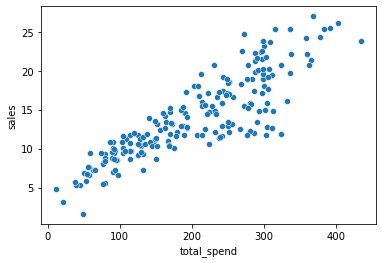

In [5]:
sns.scatterplot(x='total_spend',y='sales',data=df)

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

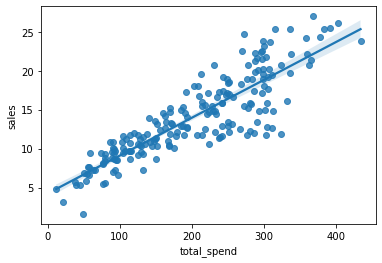

In [6]:
# Basically, we want to figure out how to create this line
sns.regplot(x='total_spend',y='sales',data=df)

In [7]:
X = df['total_spend']
y = df['sales']

In [8]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [9]:
# Returns highest order coef first!
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

In [10]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)

In [11]:
predicted_sales =  0.04868788*potential_spend + 4.24302822

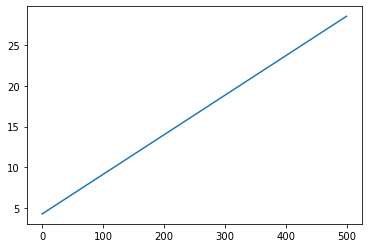

In [12]:
plt.plot(potential_spend,predicted_sales)

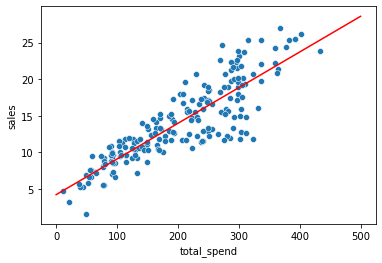

In [13]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

In [14]:
spend = 200
predicted_sales =  0.04868788*spend + 4.24302822

In [15]:
predicted_sales

13.98060422

In [16]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [17]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)

In [18]:
predicted_sales =   3.07615033e-07*potential_spend**3 + -1.89392449e-04*potential_spend**2 + 8.20886302e-02*potential_spend**1 + 2.70495053e+00

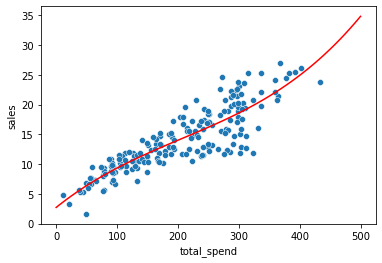

In [19]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

# Linear Regression with SciKit-Learn

In [20]:
df = pd.read_csv("Advertising.csv")

In [21]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


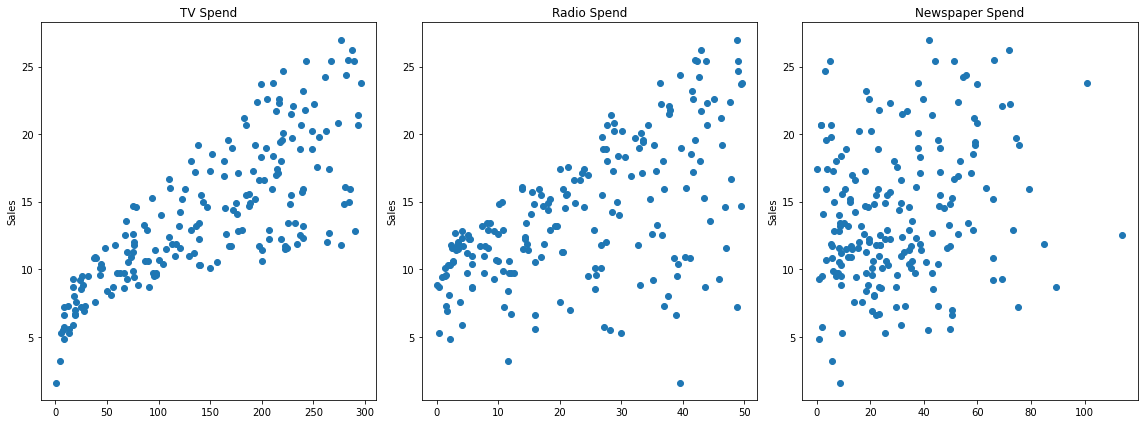

In [22]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

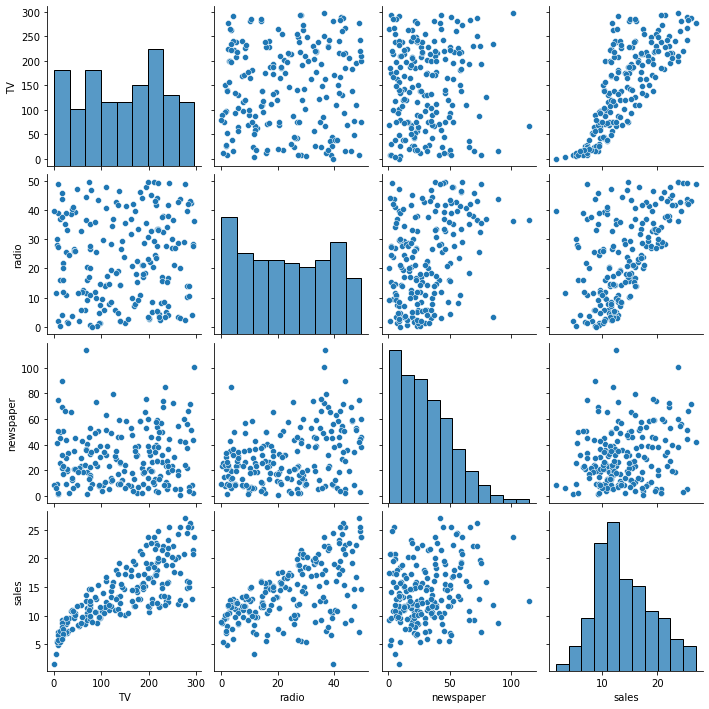

In [23]:
sns.pairplot(df)

In [24]:
X = df.drop('sales',axis=1)

In [25]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [26]:
y = df['sales']

## Fit/Train the Model on the training data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Define train and test split of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
len(df)

200

In [30]:
len(X_train)

140

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
#help(LinearRegression)

In [33]:
model = LinearRegression()

In [37]:
# Train the train split of the model using LinearRegression
model.fit(X_train,y_train)

LinearRegression()

## Evaluation on the Test Set

In [39]:
# Predict the results of the test split of the model
test_predictions = model.predict(X_test)
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [41]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [42]:
MAE

1.2137457736144803

In [43]:
RMSE

1.5161519375993877

If the MAE is good and the RMSE is bad, it means that the model has some points way off the mean.

In [44]:
df['sales'].mean()

14.022500000000003

## Residuals Plot

In [45]:
# Predictions on training and testing sets
# Doing residuals separately will alert us to any issue with the split call
test_predictions = model.predict(X_test)

In [46]:
# If our model was perfect, these would all be zeros
test_res = y_test - test_predictions

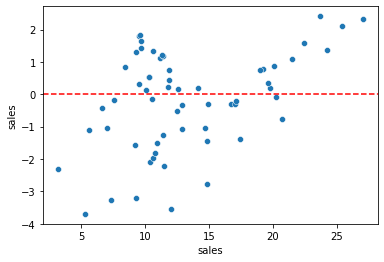

In [52]:
# The point of this plot is make sure there is no clear line or curve distribution, that will indicate that linear regression is not a good model for this dataset
# The best fit should look random and proportional distributed around zero
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [50]:
len(test_res)

60

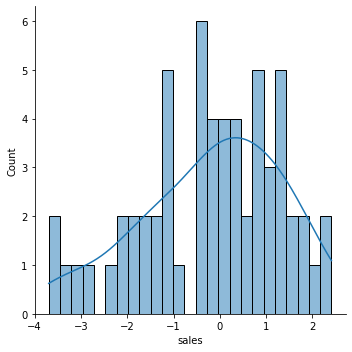

In [51]:
sns.displot(test_res,bins=25,kde=True)

In [53]:
import scipy as sp

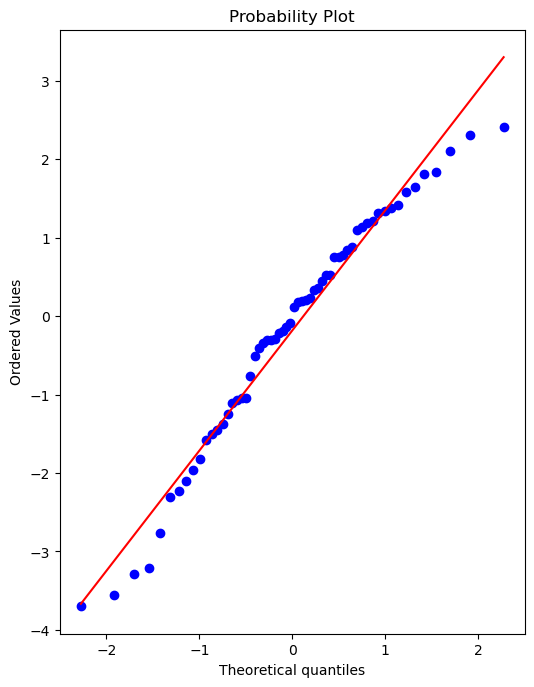

In [55]:
# The read line is what a normal distribution looks like, this graphic shows how our residuals match with it
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_res,plot=ax)

## Final Model, Predictions, and Model Attributes

In [58]:
# Retraining Model on Full Data
final_model = LinearRegression()

In [64]:
final_model.fit(X,y)

LinearRegression()

In [65]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [63]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


The resultant coeficient shows that TV and radio has a positive influence on Sales and newspaper has negative nearly zero influence on Sales

In [73]:
X.shape

(200, 3)

In [74]:
# New campaign will have 149 units for TV, 22 units for radio, 12 units for newspaper
# How many predicted sales?
campaign = [[149,22,12]]

In [75]:
final_model.predict(campaign)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

## Deployment - Model Persistence (Saving and Loading a Model)

In [76]:
from joblib import dump, load

In [77]:
dump(final_model, 'sales_model.joblib') 

['sales_model.joblib']

In [78]:
loaded_model = load('sales_model.joblib')

In [79]:
loaded_model.predict(campaign)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])